# Teaching A Machine To Add

#### Introduction: 
In this project, I am examining a few machine learning models. With each of these models, I am asking the following questions: 
* How well will this model predict the addition of 2 numbers? 
* What if it were given imperfect data?
* How would more data relate to predictive ability?
    
The purpose of this study is to get a better understanding of how each of these models behave. 

#### Rules For This Experiment: 
1. No feature engineering or excluding outliers. Otherwise, the problem is solved before the machine learning model starts.
2. Default settings only. For the neural network, there is no default setting per se, so I've tried to keep things simple.

#### Summary of Results:
* Linear regression worked very well as was expected.
* There were very interesting patterns created by the predictions of some of the models. This is related to the randomised input data for model training.
* The neural network worked very well, but ended up getting wider layers than I expected. I also found that dropout layers didn't improve performance. Most surprisingly, the neural network trained extremely quickly.
* Completely unsurprisingly, classifiers are not as good at adding.

#### Other Notes:
* Sorry for all of the naked Excepts **¯\\\_(ツ)\_/¯**

# Import Libraries

In [1]:
import random
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["axes.formatter.min_exponent"] = 10  # no scientific notation in graphs
# mpl.rcParams["axes.formatter.useoffset"] = False
import seaborn as sns
sns.set_theme()

# Classes to Generate Training and Test Data

In [2]:
class AddMe(list):
    '''
    makes a list of length list_size with x1, x2, and y
    sometimes y is random, but math_accuracy of the time y = x1 + x2
    this is an added list, along with some errors / noise 
    other notes:
    inherits from list 
    lists of lists works as a data structure for sklearn
    '''

    def __init__(self, list_size, math_accuracy):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.math_accuracy = math_accuracy
        self.list_initialise(self.list_size, self.math_accuracy)
    
    def __str__(self):
        return f"{self.list_size} training numbers at {self.math_accuracy:.0%} accuracy"

    def list_initialise(self, list_size, math_accuracy):
        for i in range(list_size):
            # initialise x and y values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            
            # set y to be the addition of x1 and x2
            y = x1 + x2
            
            # set y to a random value if math_accuracy is exceeded
            if i / list_size >= math_accuracy:
                while y == x1 + x2:
                    # rand num * 2 so that plot and rand share the same domain
                    y = random.randint(self.MIN_NUM * 2, self.MAX_MUM * 2)
            
            self.append([x1, x2, y])

        # sort finished list so errors are not clustered
        self.sort()


class TestMe(list):
    '''
    makes a list of length list_size with random x1, x2
    to be used for testing
    '''

    def __init__(self, list_size):
        self.MIN_NUM = -100
        self.MAX_MUM = 100
        self.list_size = list_size
        self.list_initialise(self.list_size)

    def __str__(self):
        return f"{self.list_size} test numbers"

    def list_initialise(self, list_size):
        for i in range(list_size):
            # initialise x values
            x1 = random.randint(self.MIN_NUM, self.MAX_MUM)
            x2 = random.randint(self.MIN_NUM, self.MAX_MUM)
            self.append([x1, x2])
        

In [3]:
# Initialise Training Sets
# small, medium, and large, between 50% and 100% accuracy

small_100 = AddMe(100, 1)
small_99 = AddMe(100, 0.99)
small_90 = AddMe(100, 0.9)
small_75 = AddMe(100, 0.75)
small_50 = AddMe(100, 0.5)

medium_100 = AddMe(1000, 1)
medium_99 = AddMe(1000, 0.99)
medium_90 = AddMe(1000, 0.9)
medium_75 = AddMe(1000, 0.75)
medium_50 = AddMe(1000, 0.5)

large_100 = AddMe(10000, 1)
large_99 = AddMe(10000, 0.99)
large_90 = AddMe(10000, 0.9)
large_75 = AddMe(10000, 0.75)
large_50 = AddMe(10000, 0.5)


# Check Math Function

In [4]:
def check_math(inputlist):
    '''
    takes in list of list, x1, x2, and y
    returns number of rows, # times y = x1 + x2, # times y ~ x1 + x2, and mean square error
    ie, (rows, correct_when_rounded, correct, MSE)
    '''

    rows = 0
    correct_when_rounded = 0
    correct = 0
    MSE = 0

    for x in inputlist:
        rows += 1

        # correct_when_rounded needs to slice into np.array() for tensorflow        
        try:
            if round(x[0] + x[1]) == round(x[2]):
                correct_when_rounded += 1
        except:
            if round(x[0] + x[1]) == round(x[2][0]):
                correct_when_rounded += 1

        if x[0] + x[1] == x[2]:
            correct += 1
        else:
            MSE += (x[2] - (x[0] + x[1])) ** 2

    MSE = MSE / rows
    
    return rows, correct_when_rounded, correct, MSE


# Import and Initialise ML Models

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# initialise all models
# just use default parameters
# tuning is likely to improve any of these models

# decision tree
dt_model = DecisionTreeClassifier()

# # naive Bayes
nb_model = GaussianNB()

# linear regression
lr_model = LinearRegression()

# random forest
rf_model = RandomForestClassifier()

# xgboost
xgb_model = XGBRegressor()

# tensor flow (not "default", but only moderate tuning)
tf_width = 256  # lower values perform poorly
tf_dropout = 0  # seems to perform negatively in most cases
tf_model = Sequential()
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(tf_width, activation="relu"))
tf_model.add(Dropout(tf_dropout))
tf_model.add(Dense(1))
tf_model.compile(optimizer="rmsprop", loss="mse")

# Lists of Models and Training Sets

In [6]:
# set up lists of models / sets

list_of_models = [dt_model, nb_model, lr_model, rf_model, xgb_model, tf_model]

training_sets = [small_100, small_99, small_90, small_75, small_50, 
                 medium_100, medium_99, medium_90, medium_75, medium_50, 
                 large_100, large_99, large_90, large_75, large_50]


# Functions: Train, Predict

In [7]:
def train_model(model, training_set):
    # split into X and y
    ind_var = [sublist[:2] for sublist in training_set]  # x1 and x2
    dep_var = [sublist[2] for sublist in training_set]  # y

    # fit to training set (np.array() for XGBoost)
    try:
        # verbose=0 for tensorflow
        model.fit(np.array(ind_var), np.array(dep_var), verbose=0)
    except:
        model.fit(np.array(ind_var), np.array(dep_var))
        
    return model


def predict_model(model, test_set):
    # uses np.array() for XGBoost
    try:
        # verbose=0 for tensorflow
        return model.predict(np.array(test_set), verbose=0)
    except:
        return model.predict(np.array(test_set))


def get_name_of_model(model):
    model_text = str(model).split("(")[0]
    if model_text[0] == "<":
        model_text = "Keras.TensorFlow"

    return model_text


# Train all models on all training sets and output prediction summary from check_math()

In [8]:
def fit_model_to_data(model, list_of_training_sets, n_tests):
    '''
    Takes in the ML model, a list of training sets, and the number of
    tests to perform. Checks math using check_math() from above.
    Uses np.array() to match input requirements for XGBoost; lists
    of lists work for sklearn models.
    '''
    
    # These are likely the same as the min and max above
    # but they don't need to be. Maybe try testing extreme values.
    MIN_TEST = -100
    MAX_TEST = 100

    # initialise an empty list 
    results = []

    for training_set in list_of_training_sets:

        # fit model
        fit_model = train_model(model, training_set)

        # test model
        test_set = TestMe(n_tests)
        predictions = predict_model(model, test_set)
        test_list = np.column_stack((test_set, predictions))
        
        # test predictions with check_math(inputlist)
        results.append(check_math(test_list))

    return results


In [9]:
%%time
n_model = 0
n_tests = 1000

dt_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(dt_results))

DecisionTreeClassifier
       0    1    2     3
0   1000   32   32  1119
1   1000   21   21  1005
2   1000   11   11  3030
3   1000   16   16  6641
4   1000   15   15 10015
5   1000   63   63    47
6   1000   69   69   227
7   1000   62   62  1910
8   1000   48   48  5010
9   1000   37   37  9625
10  1000  271  271     3
11  1000  281  281    44
12  1000  257  257  2087
13  1000  203  203  5161
14  1000  141  141  9907
Wall time: 665 ms


In [10]:
%%time
n_model = 1
n_tests = 1000

nb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(nb_results))

GaussianNB
       0   1   2    3
0   1000  10  10 1482
1   1000  10  10 1873
2   1000   9   9 3875
3   1000  11  11 2552
4   1000  12  12 7774
5   1000  21  21  229
6   1000  36  36  306
7   1000  23  23  762
8   1000  21  21 4011
9   1000   9   9 3736
10  1000  19  19  370
11  1000  28  28  357
12  1000  15  15  528
13  1000  14  14  515
14  1000  14  14  887
Wall time: 539 ms


In [11]:
%%time
n_model = 2
n_tests = 1000

lr_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(lr_results))

LinearRegression
       0     1    2    3
0   1000  1000   36    0
1   1000   184    0    4
2   1000   105    0   10
3   1000    11    0  539
4   1000    15    0  450
5   1000  1000  133    0
6   1000   800    0    0
7   1000    48    0   56
8   1000    17    0  324
9   1000     9    0 1673
10  1000  1000   82    0
11  1000   499    0    0
12  1000    60    0   63
13  1000    24    0  417
14  1000    11    0 1738
Wall time: 351 ms


In [12]:
%%time
n_model = 3
n_tests = 1000

rf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(rf_results))

RandomForestClassifier
       0    1    2     3
0   1000   24   24   346
1   1000   23   23   681
2   1000   16   16  1944
3   1000   15   15  6766
4   1000   15   15  9563
5   1000   84   84    28
6   1000   65   65   119
7   1000   70   70  1478
8   1000   50   50  4489
9   1000   40   40 11057
10  1000  232  232     3
11  1000  239  239   238
12  1000  227  227  2039
13  1000  193  193  5128
14  1000  109  109  9574
Wall time: 34 s


In [13]:
%%time
n_model = 4
n_tests = 1000

xgb_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(xgb_results))

XGBRegressor
       0    1  2    3
0   1000   45  0  137
1   1000   33  0  236
2   1000   26  0  940
3   1000   22  0 4944
4   1000   13  0 6243
5   1000  112  0   14
6   1000  110  0   90
7   1000   56  0 1019
8   1000   16  0 2232
9   1000   10  0 6006
10  1000  302  0    2
11  1000  214  0  143
12  1000   45  0  419
13  1000   23  0  940
14  1000    8  0 2963
Wall time: 2.06 s


In [14]:
%%time
n_model = 5
n_tests = 1000

tf_results = fit_model_to_data(list_of_models[n_model], training_sets, n_tests)
print(get_name_of_model(list_of_models[n_model]))
print(pd.DataFrame(tf_results))

Keras.TensorFlow
       0    1  2    3
0   1000   10  0  837
1   1000    1  0 1023
2   1000   22  0  274
3   1000    5  0 1200
4   1000   26  0  996
5   1000  153  0  193
6   1000   75  0   31
7   1000   25  0  625
8   1000   32  0  578
9   1000    7  0 2578
10  1000  187  0    7
11  1000   74  0   40
12  1000  141  0   53
13  1000   30  0  801
14  1000    6  0 2355
Wall time: 4.58 s


# Summary of Model Performance

In [15]:
list_of_results = [dt_results, nb_results, lr_results, rf_results, xgb_results, tf_results]

list_of_model_names = ['Decision Tree', 'Naive Bayes', 'Linear Regression', 
                       'Random Forest', 'XGBoost', 'Keras TensorFlow']

list_of_settings = [[100, 100], [100, 99], [100, 90], [100, 75], [100, 50], 
                    [1000, 100], [1000, 99], [1000, 90], [1000, 75], [1000, 50], 
                    [10000, 100], [10000, 99], [10000, 90], [10000, 75], [10000, 50]]

df_settings = pd.DataFrame(list_of_settings)
MSE_summary = pd.DataFrame()

for i, x in enumerate(list_of_results):
    name = list_of_model_names[i]
    x = pd.DataFrame(x)
        
    # generate a list of lists of "name" same length as x
    name_df = []
    for j in x[0]:
        name_df.append([name])
    name_df = pd.DataFrame(name_df)
        
    x = pd.concat([name_df, df_settings, x.iloc[:, 1], x.iloc[:, 3]], axis=1)
        
    MSE_summary = pd.concat([MSE_summary, x], axis=0)

MSE_summary.columns = ['Model', 'Size', 'Accuracy', 'Correct_per_1000', 'Mean_Squared_Error']
MSE_summary = MSE_summary.reset_index(drop=True)  # reset index for Seaborn

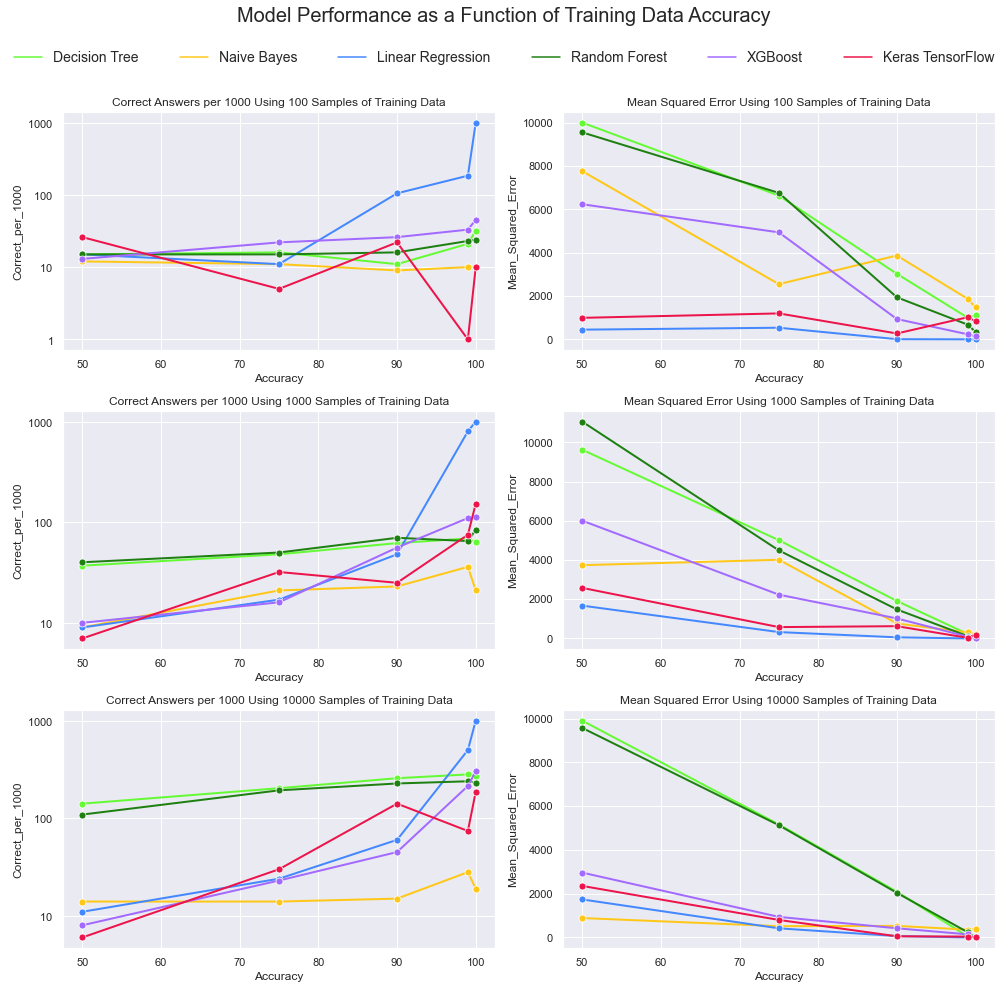

In [16]:
# Model Performance as a Function of Training Data Accuracy
# Version 2 graphing using subplots and additional formatting

custom_palette = ['#64FB34', '#FFC818', '#4488FF', '#1E8011', '#A26AFF', '#EC144A']

figsize=(14, 14)
fig, axes = plt.subplots(3, 2, figsize=figsize)

fig.suptitle("Model Performance as a Function of Training Data Accuracy\n\n\n", fontsize=20)


# CORRECT ANSWERS
title = "Correct Answers per 1000 Using {} Samples of Training Data"

sample_size = 100
ax=axes[0,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()

sample_size = 1000
ax=axes[1,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()

sample_size = 10000
ax=axes[2,0]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(yscale='log')
ax.get_legend().remove()


# MEAN SQUARED ERROR
title = "Mean Squared Error Using {} Samples of Training Data"

sample_size = 100
ax=axes[0,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()

sample_size = 1000
ax=axes[1,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()

sample_size = 10000
ax=axes[2,1]
ax.set_title(title.format(sample_size))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Size==sample_size],  # only max training size shown
                    x='Accuracy', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
ax.get_legend().remove()


# one legend to rule them all
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', mode="expand", bbox_to_anchor=(0, 0, 1, 0.95),
           ncol=6, fontsize=14, borderpad=0.5, frameon=False)


# plot in tight layout
fig.tight_layout()

# save the image
plt.savefig('performance_v_accuracy.png', facecolor='w')



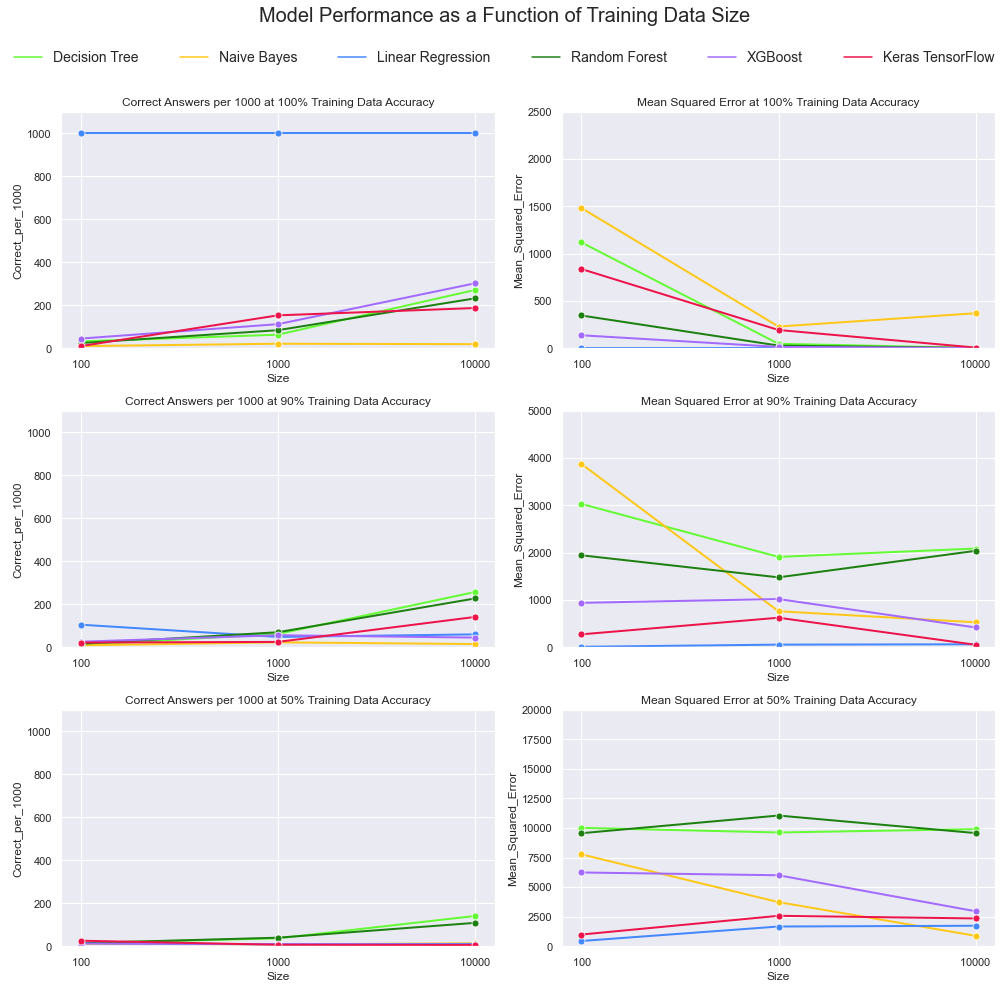

In [17]:
# Model Performance as a Function of Training Data Size
# Version 2 graphing using subplots and additional formatting

custom_palette = ['#64FB34', '#FFC818', '#4488FF', '#1E8011', '#A26AFF', '#EC144A']

figsize=(14, 14)
fig, axes = plt.subplots(3, 2, figsize=figsize)

fig.suptitle("Model Performance as a Function of Training Data Size\n\n\n", fontsize=20)


# CORRECT ANSWERS
title = "Correct Answers per 1000 at {}% Training Data Accuracy"

ylim=(0, 1100)

training_accuracy = 100
ax=axes[0,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 90
ax=axes[1,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 50
ax=axes[2,0]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Correct_per_1000', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=ylim)
plot.set(xscale='log')
ax.get_legend().remove()


# MEAN SQUARED ERROR
title = "Mean Squared Error at {}% Training Data Accuracy"

training_accuracy = 100
ax=axes[0,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 2500))
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 90
ax=axes[1,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 5000))
plot.set(xscale='log')
ax.get_legend().remove()

training_accuracy = 50
ax=axes[2,1]
ax.set_title(title.format(training_accuracy))
plot = sns.lineplot(data=MSE_summary[MSE_summary.Accuracy==training_accuracy],  # only max training size shown
                    x='Size', y='Mean_Squared_Error', # style='Size',
                    hue='Model', palette=custom_palette, linewidth=2,
                    marker="o", markersize=7, ax=ax);
plot.set(ylim=(0, 20000))
plot.set(xscale='log')
ax.get_legend().remove()

# one legend to rule them all
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', mode="expand", bbox_to_anchor=(0, 0, 1, 0.95),
           ncol=6, fontsize=14, borderpad=0.5, frameon=False)


# plot in tight layout
fig.tight_layout()

# save the image
plt.savefig('performance_v_size.png', facecolor='w') 


# How Did I Do?
Checking predictions on individual sets of numbers.

In [18]:
# how did I do?

def how_did_i_do(model, a_test, b_test):
    try:  # tensorflow
        guess = predict_model(model, [[a_test, b_test]])[0][0]
    except:
        guess = predict_model(model, [[a_test, b_test]])[0]

    print(f"I am {get_name_of_model(model)}.\nI think that {a_test} + {b_test} = {guess:0.2f}\nHow did I do?")


In [19]:
def test_how_i_did(trainingset_n, model_n, a_test, b_test):
    current_training_set = training_sets[trainingset_n]
    current_train_model = list_of_models[model_n]
#     print(f"I was trained using {training_sets[trainingset_n]}.")
    how_did_i_do(train_model(current_train_model, current_training_set), a_test, b_test)
    print()
    

In [20]:
test_how_i_did(12, 5, 7, 6)

I am Keras.TensorFlow.
I think that 7 + 6 = 10.43
How did I do?



In [21]:
def how_did_all_models_do(test_set, a_test, b_test):
    current_training_set = training_sets[test_set]

    print(current_training_set, "\n")
    
    for i in range(len(list_of_models)):
        test_how_i_did(test_set, i, a_test, b_test)


In [22]:
how_did_all_models_do(10, 3, 4)

10000 training numbers at 100% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = 5.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = -16.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 7.00
How did I do?

I am RandomForestClassifier.
I think that 3 + 4 = 5.00
How did I do?

I am XGBRegressor.
I think that 3 + 4 = 8.32
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 7.26
How did I do?



In [23]:
how_did_all_models_do(3, 3, 4)

100 training numbers at 75% accuracy 

I am DecisionTreeClassifier.
I think that 3 + 4 = -15.00
How did I do?

I am GaussianNB.
I think that 3 + 4 = 2.00
How did I do?

I am LinearRegression.
I think that 3 + 4 = 6.52
How did I do?

I am RandomForestClassifier.
I think that 3 + 4 = -15.00
How did I do?

I am XGBRegressor.
I think that 3 + 4 = -21.24
How did I do?

I am Keras.TensorFlow.
I think that 3 + 4 = 5.02
How did I do?



# Visualisation: Scatterplot of Training vs Prediction

In [24]:
def prediction_output(model, n_tests):
    test_set = TestMe(n_tests)
    y_predict = predict_model(model, test_set)
    return np.column_stack((test_set, y_predict))


In [25]:
def scatterplot_accuracy(dataset, **kwargs):
    '''
    plots predicted vs correct as a scatterplot
    test x1 + x2 = y, plot predictions vs y_actual
    '''

    # print(dataset)  # this only works with classes w __str__ (AddMe)

    correct_plot = [sublist[0] + sublist[1] for sublist in dataset]
    predict_plot = [sublist[2] for sublist in dataset]

    plot = sns.scatterplot(x=correct_plot, y=predict_plot, **kwargs)
    plot.set(ylim=(-200, 200))
    

In [26]:
def grid_of_scatterplots(training_set_list, list_of_training_models, n_tests):
    
    figsize = (20, 30)
    no_sets = len(training_set_list)
    no_models = len(list_of_training_models) + 1
    
    fig, axes = plt.subplots(no_models, no_sets, figsize=figsize)
    
    fig.suptitle("Scatterplots of Predicted vs Correct Answers\n\n", fontsize=30)
    
    ax_y = 0
    
    for training_set in training_set_list:
        
        current_training_set = training_sets[training_set]
        ax_x = 0
        ax=axes[ax_x, ax_y]
        ax.set_title(current_training_set, fontsize=16)
        
        # training set plot
        training_set_to_plot = current_training_set
        
        plot = scatterplot_accuracy(training_set_to_plot, color=".5", s=20, ax=ax)
        
        ax_x +=1

        # plot all tests
        for current_model in list_of_training_models:
            ax=axes[ax_x, ax_y]
            
            current_test_model = train_model(current_model, current_training_set)
            set_to_plot = prediction_output(current_test_model, n_tests)
            plot = scatterplot_accuracy(set_to_plot, s=20, ax=ax)
            ax.set_title(get_name_of_model(current_model), fontsize=16)
            
            ax_x +=1
            
        ax_y +=1
        
    # plot in tight layout
    fig.tight_layout()


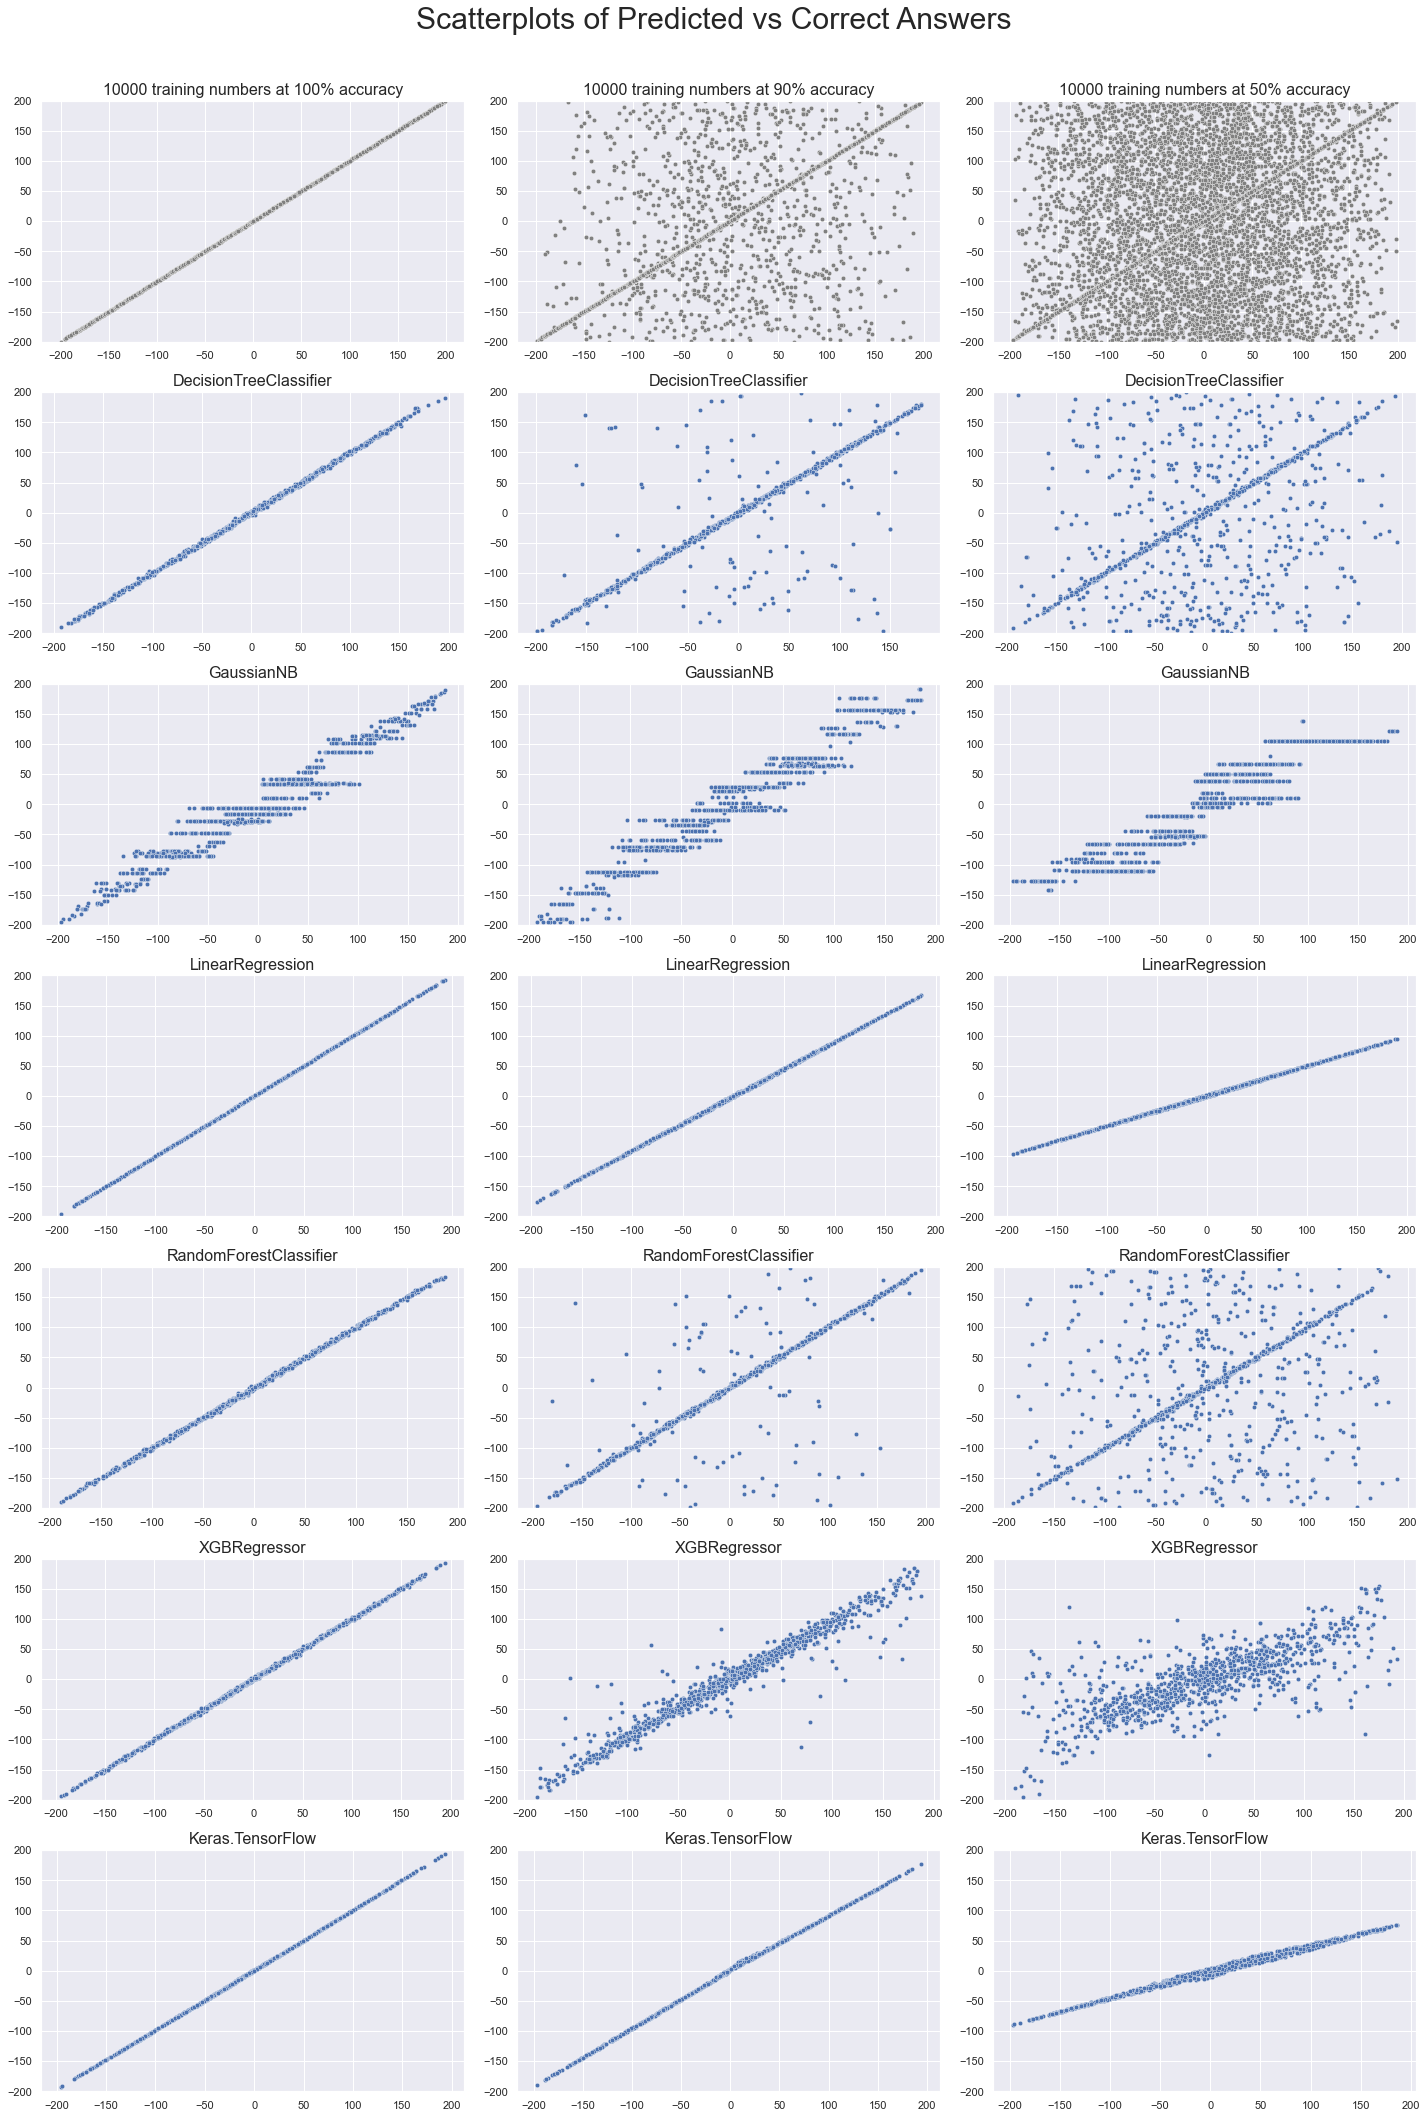

In [27]:
sets_to_plot = [10, 12, 14]
grid_of_scatterplots(sets_to_plot, list_of_models, 1000)
plt.savefig('predictions_10k_samples.png', facecolor='w') 

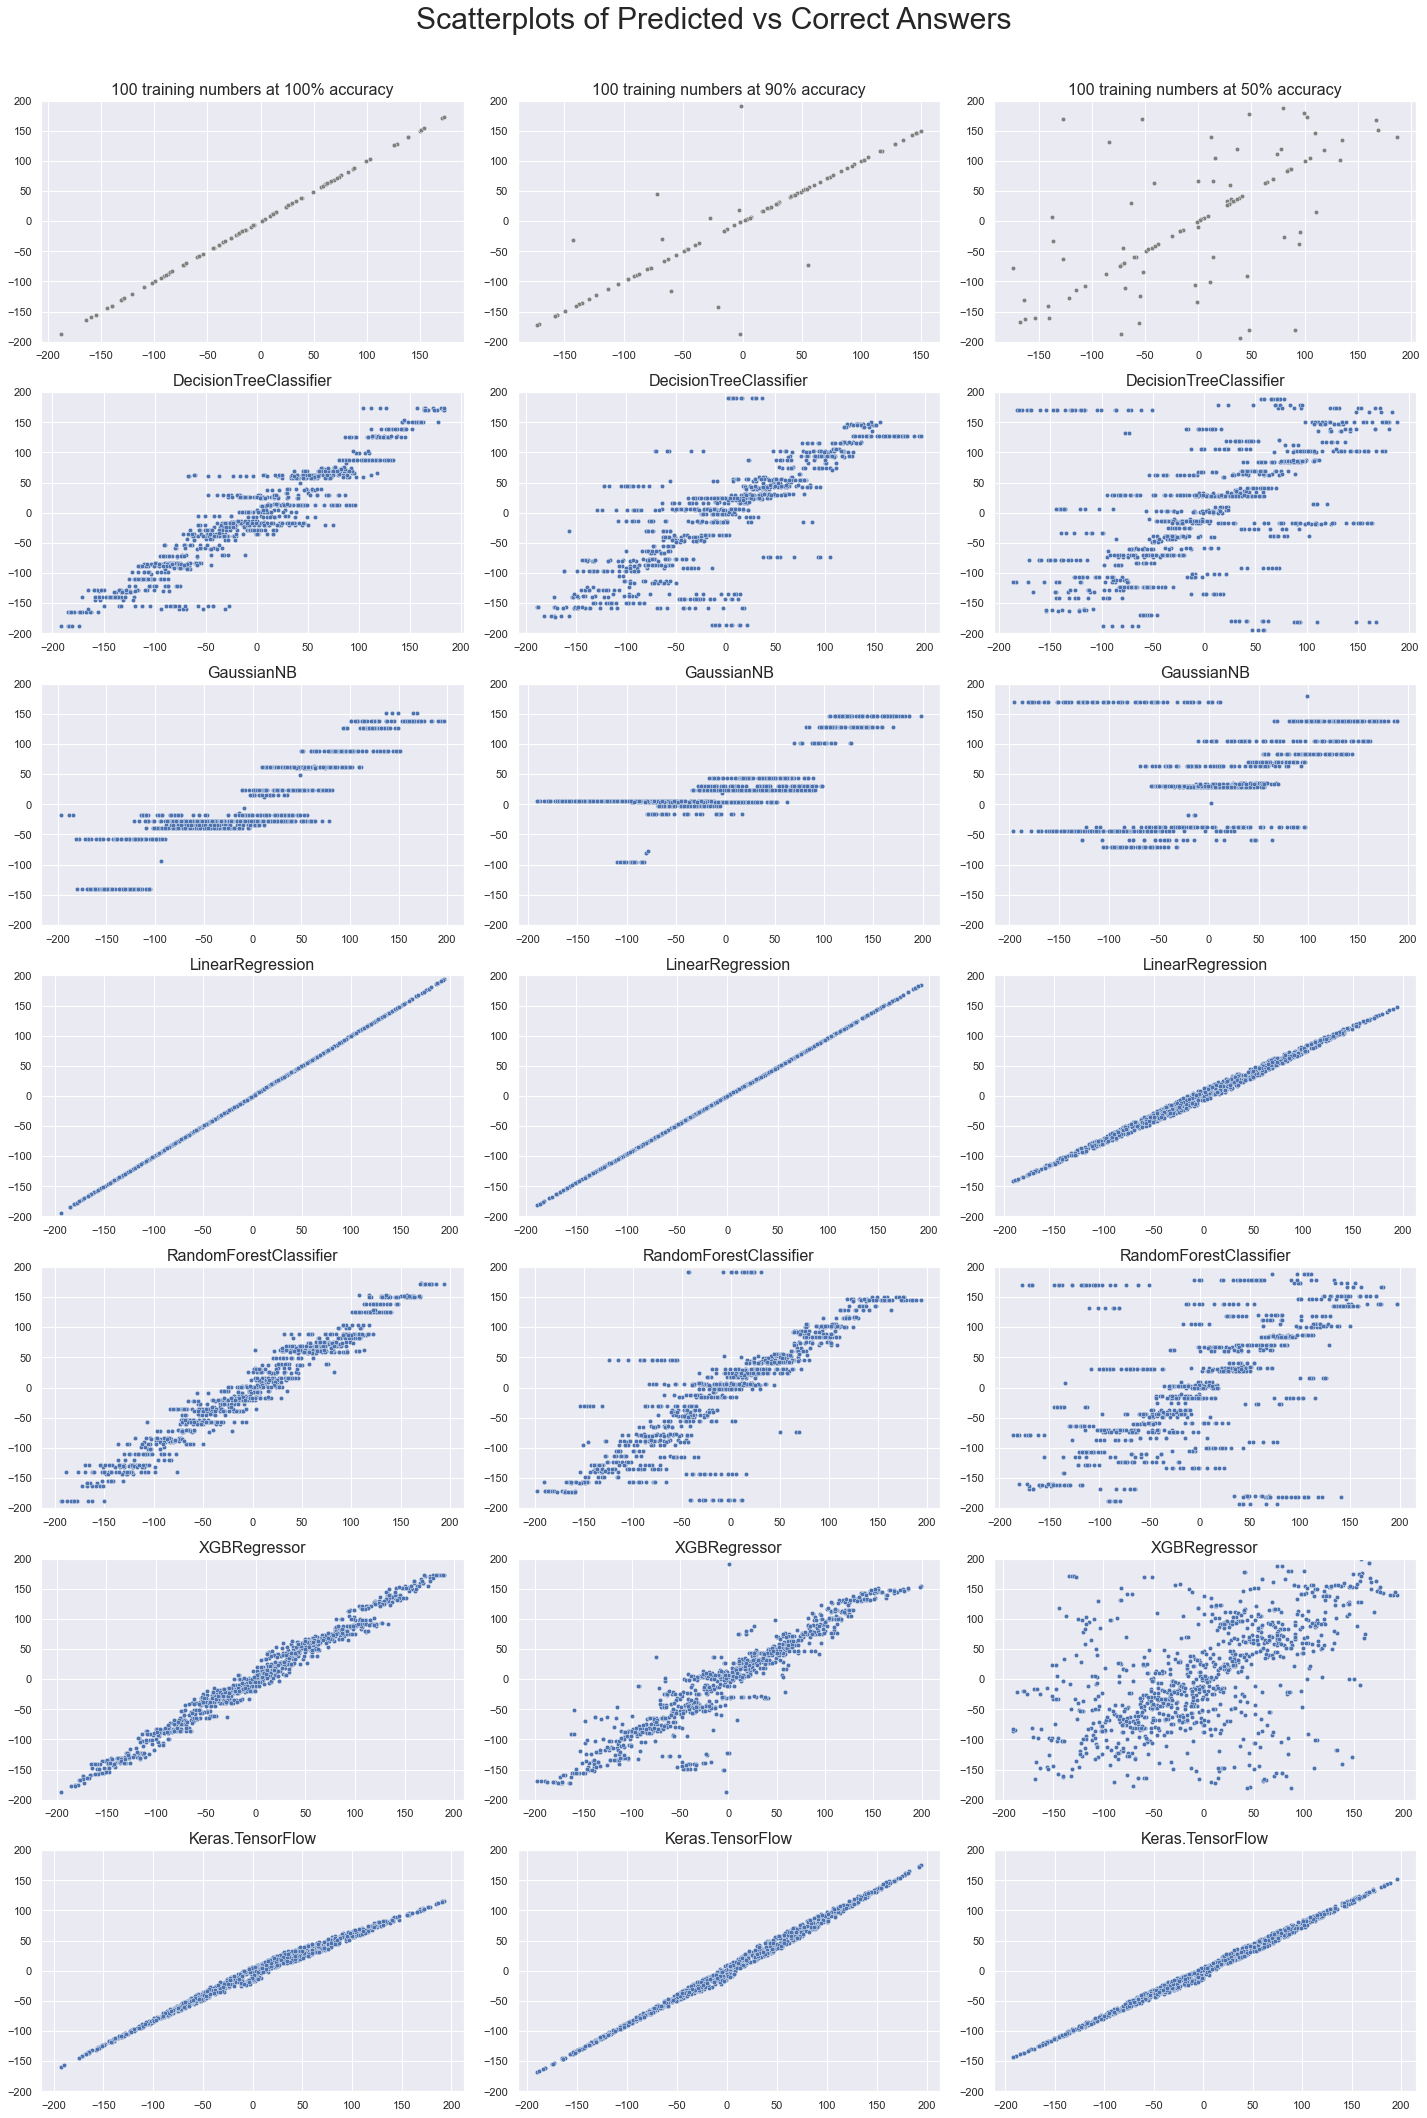

In [28]:
sets_to_plot = [0, 2, 4]
grid_of_scatterplots(sets_to_plot, list_of_models, 1000)
plt.savefig('predictions_100_samples.png', facecolor='w') 

# Predictions Grid Visualisation

In [8]:
def prediction_grid(trainingset_n, model_n, grid_min, grid_max):
    '''
    plot of a grid with predictions
    '''

    current_training_set = training_sets[trainingset_n]
    current_train_model = list_of_models[model_n]

    # trained model to use for grid construction
    current_test_model = train_model(current_train_model, current_training_set)

    grid = []
    row = []

    for i in range(grid_min, grid_max + 1, 1):
        row = []
        for j in range(grid_min, grid_max + 1, 1):
            temp_prediction = predict_model(current_test_model, [[i, j]])
            try:
                row.append(temp_prediction[0][0])
            except:
                row.append(temp_prediction[0])
        grid.append(row)

    return grid

In [9]:
def heatmap_grid(trainingset_n, model_n, grid_min, grid_max, **kwargs):
    figsize=(6, 6)
    grid = pd.DataFrame(prediction_grid(trainingset_n, model_n, grid_min, grid_max))
    plt.figure(figsize=figsize)
        
    plot = sns.heatmap(grid, cmap='Blues', annot=True, fmt='.0f', linewidths=.5, 
                       vmin=0, vmax=20, cbar=False, **kwargs);  # vmin and vmax need to be updated with pridiction grid
    plot.set_title(get_name_of_model(list_of_models[model_n]), fontsize=18)
    plot.set_xlabel('To This Value')
    plot.set_ylabel('Add This Value')
    plt.tight_layout()


In [50]:
def grid_of_heatmap_grids(list_training_set_num, list_of_model_num, min_num=0, max_num=10):
    '''
    defaults to grid of 0 to 10 (matches with default color pallete above)
    '''
    figsize = (15, 32)  # 3x6 aspect ratio, plus title
    num_rows = len(list_of_model_num)
    num_cols = len(list_training_set_num)
    ax_x, ax_y = 0, 0
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    fig.suptitle("Heatmaps of Predicted vs Correct Answers\n\n", fontsize=30)
    
    plt.rcParams['axes.titlepad'] = 10  # so that all titles don't get offset
    
    # Grid of Plots
    for set_number in list_training_set_num:
        ax_x = 0
        
        for model_number in list_of_model_num:
            ax = axes[ax_x, ax_y]

            grid = pd.DataFrame(prediction_grid(set_number, model_number, min_num, max_num))

            plot = sns.heatmap(grid, cmap='Blues', annot=True, fmt='.0f', linewidths=.5, 
                   vmin=0, vmax=20, cbar=False, ax=ax);  # vmin and vmax need to be updated with pridiction grid
            plot.set_title(get_name_of_model(list_of_models[model_number]), fontsize=18)
            plot.set_xlabel('To This Value')
            plot.set_ylabel('Add This Value')
            plt.tight_layout()
            
            ax_x += 1
        
        ax_y += 1
        
    # Legend
    plt.subplots_adjust(top=0.91)
    cax = plt.axes([0.05, 0.95, 0.94, 0.015])  # x, y, width, height
    mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=20), cmap='Blues')
    cbar = plt.colorbar(mappable, cax=cax, orientation='horizontal')
    ticklabs = cbar.ax.get_yticklabels()
    cbar.ax.set_yticklabels(ticklabs, fontsize=14)
    
    # Subtitles = training set information
    title1 = training_sets[list_training_set_num[0]]
    title2 = training_sets[list_training_set_num[1]]
    title3 = training_sets[list_training_set_num[2]]
    
    plt.rcParams['axes.titlepad'] = -80  # only subtitles get offset
    
    plt.title(title1, fontsize=18, loc="left")
    plt.title(title2, fontsize=18, loc="center")
    plt.title(title3, fontsize=18, loc="right")


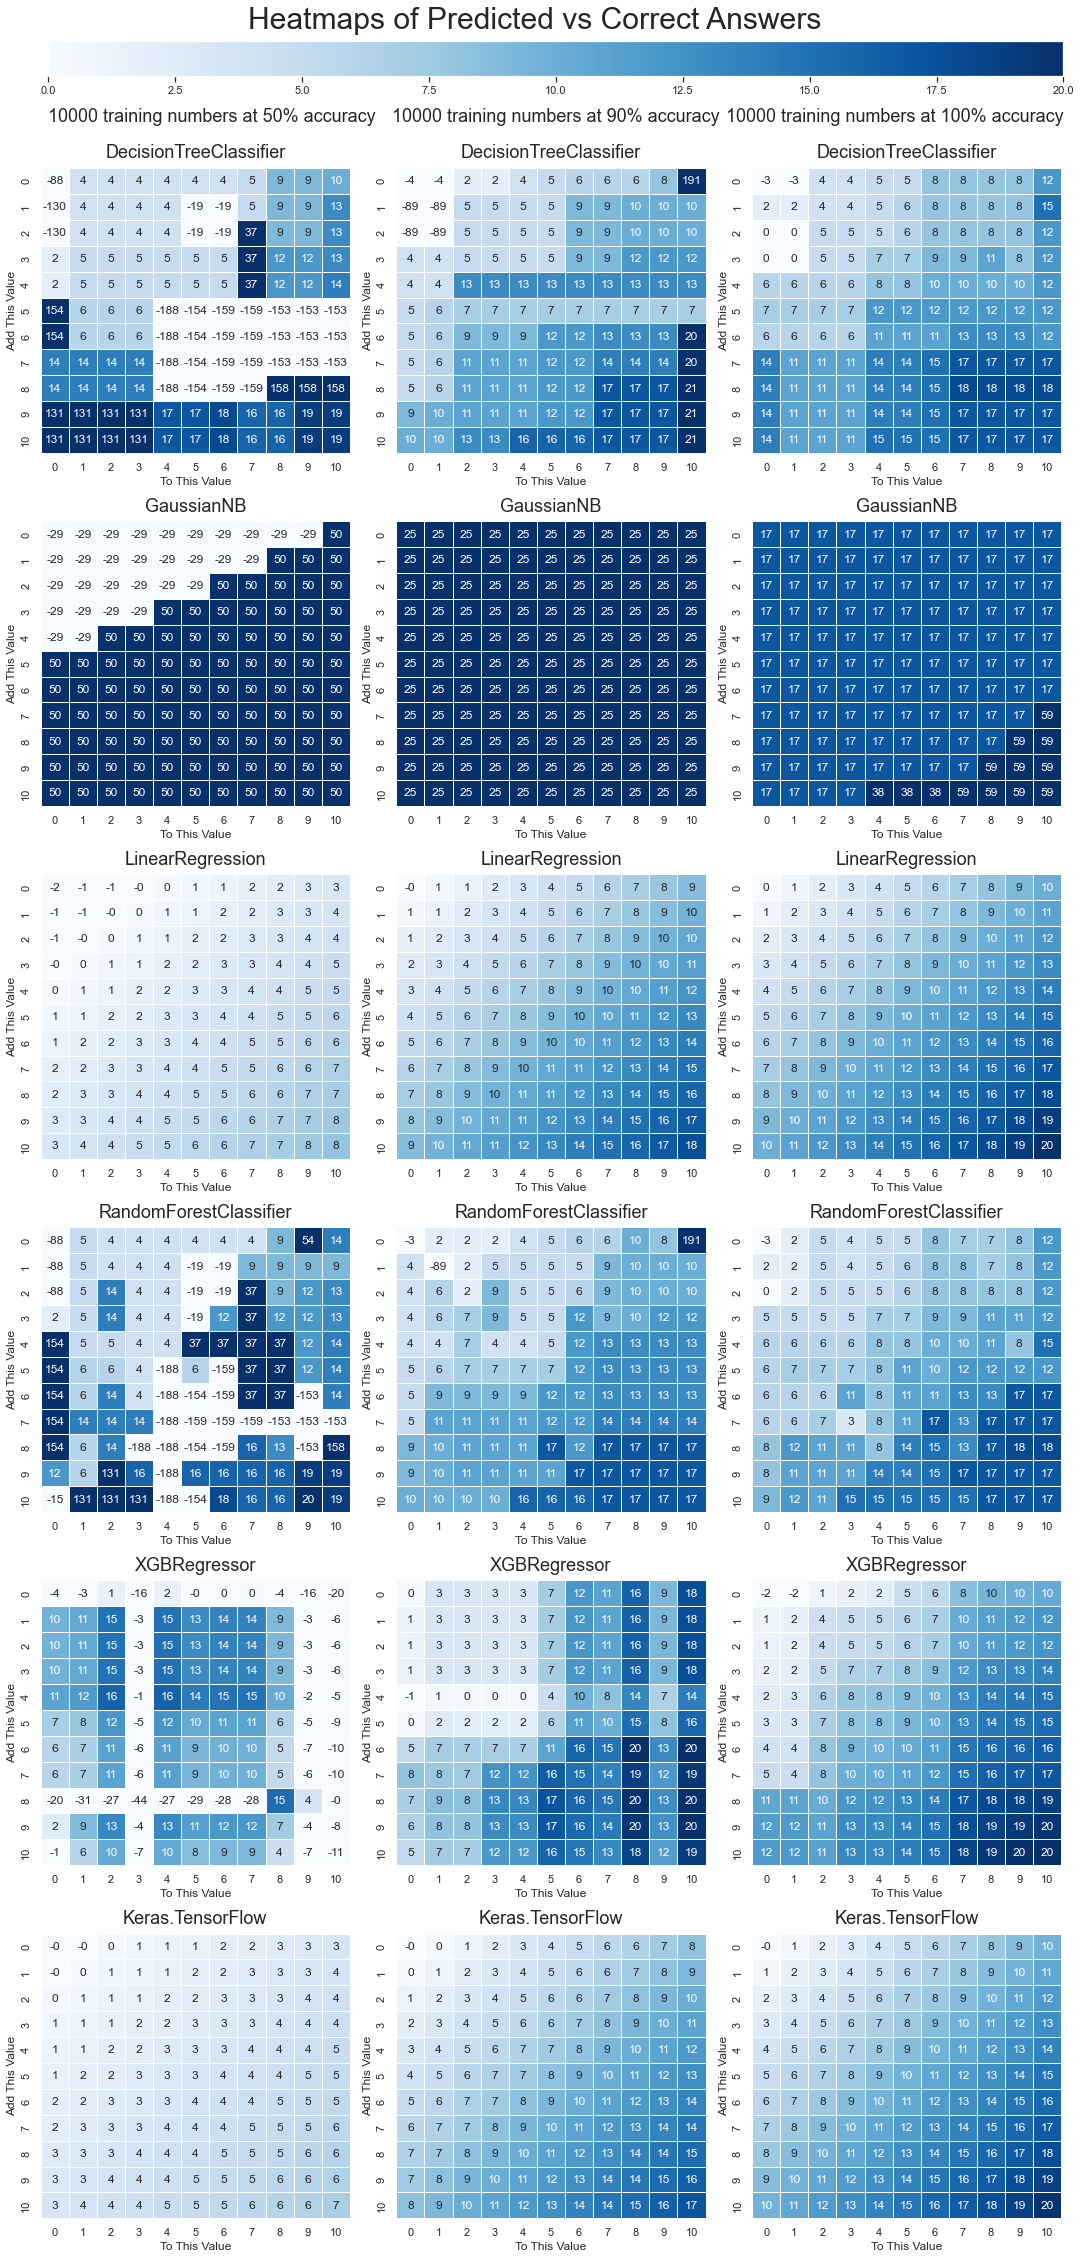

In [51]:
training_set_list = [14, 12, 10]
model_num_list = [0, 1, 2, 3, 4, 5]
grid_of_heatmap_grids(training_set_list, model_num_list)

# save the image
plt.savefig('heatmaps_of_predictions.png', facecolor='w') 